In [37]:
! pip install wordcloud
! pip install nltk
! pip install gensim

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os
from wordcloud import WordCloud , STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize , sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.metrics import classification_report,confusion_matrix 

In [39]:
df=pd.read_csv(r'B:\Major_Git\Natural_Language_processing\Resume_Selector\resume.csv',encoding='latin-1')
df.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [40]:
df=df[['resume_text','class']]
df

,resume_text,class
0,\rCustomer Service Supervisor/Tier - Isabella ...,not_flagged
1,\rEngineer / Scientist - IBM Microelectronics ...,not_flagged
2,\rLTS Software Engineer Computational Lithogra...,not_flagged
3,TUTOR\rWilliston VT - Email me on Indeed: ind...,not_flagged
4,\rIndependent Consultant - Self-employed\rBurl...,flagged
...,...,...
120,\rBrattleboro VT - Email me on Indeed: indeed....,not_flagged
121,\rResearch and Teaching Assistant - University...,not_flagged
122,\rMedical Coder - Highly Skilled - Entry Level...,not_flagged
123,\rWaterbury VT - Email me on Indeed: indeed.co...,flagged


In [41]:
df['class'].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

In [42]:
# Labeling the Data 
df['class']=df['class'].apply(lambda x:1 if x=='flagged'else 0)

In [43]:
resome_0=df[df['class']==0]
resume_1=df[df['class']==1]
print('Number of 0 class have',len(resome_0))
print('Number of 1 class have',len(resume_1))

Number of 0 class have 92
Number of 1 class have 33


In [44]:
# Data Cleaning
df['resume_text']=df['resume_text'].apply(lambda x:x.replace('\r',''))


In [45]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ombha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ombha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
from nltk.corpus import stopwords
stop_words=stopwords.words('english')
stop_words.extend(['from','subject','reply','use','email','com'])


In [47]:
# Remove Stop Words
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >2 and token not in stop_words:
            result.append(token)

    return ' '.join(result)

In [48]:
df['cleaned'] = df['resume_text'].apply(preprocess)

<Axes: xlabel='class', ylabel='count'>

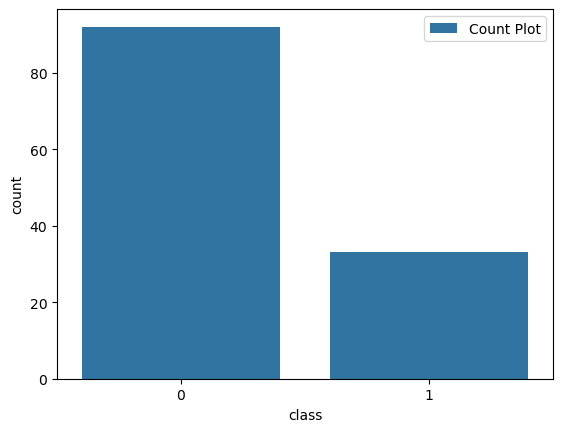

In [55]:
# Visualize the data set
sns.countplot(x=df['class'],label='Count Plot')

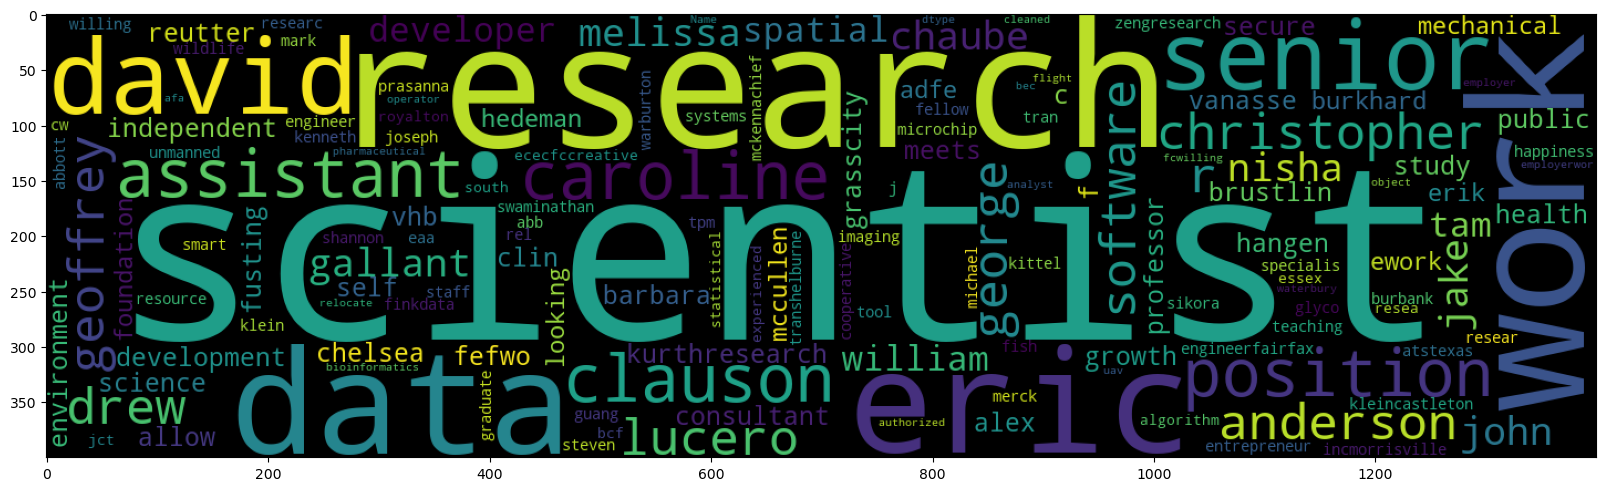

In [62]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=200,width=1400,height=400,stopwords=stop_words).generate(str(df[df['class']==1].cleaned))
plt.imshow(wc)

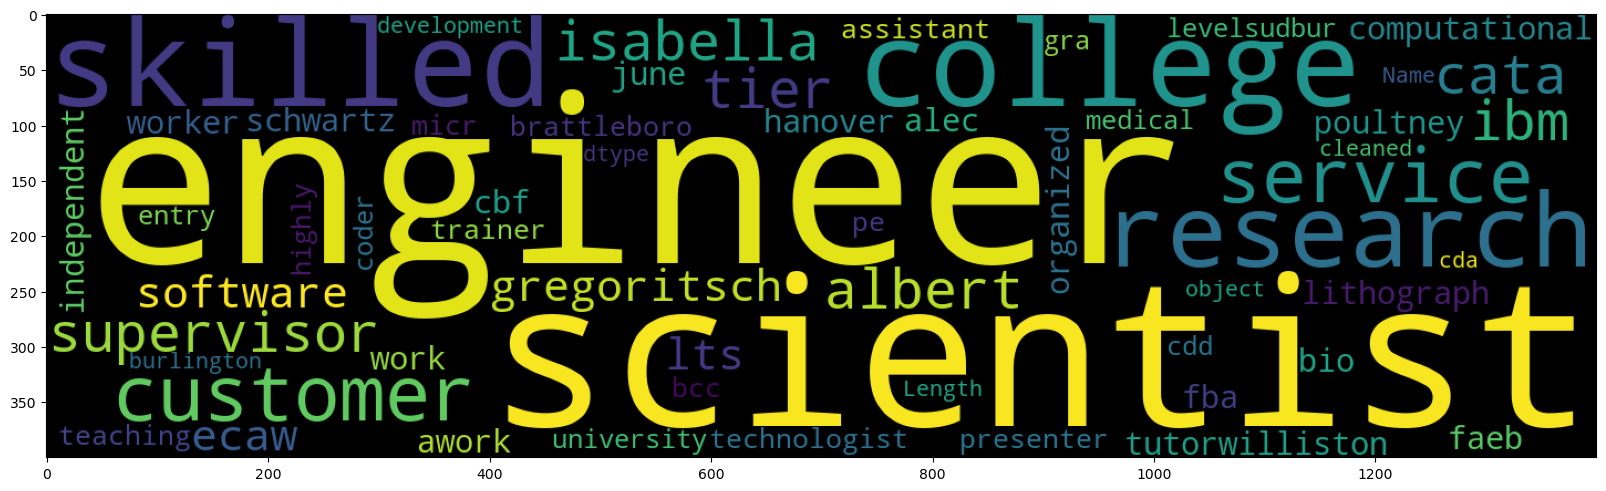

In [67]:
plt.figure(figsize=(20,20))
wc=WordCloud(max_words=200,width=1400,height=400,stopwords=stop_words).generate(str(df[df['class']==0].cleaned))
plt.imshow(wc)

In [70]:
# Applying count Vectorizer on the dataset 
from sklearn.feature_extraction.text import CountVectorizer
sample_data=['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sample_data)

In [71]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [72]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [74]:
countvectorizer=vectorizer.fit_transform(df['cleaned'])

In [75]:
print(vectorizer.get_feature_names_out())

['aaalac' 'aabb' 'aac' ... 'ãæcomputer' 'ètravel' 'ô_torrent']


In [76]:
print(countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
# Applying Naive Bayes Theorem
X=countvectorizer
y=df['class']

In [80]:
print(X.shape)
print(y.shape)

(125, 11315)
(125,)


In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

<Axes: >

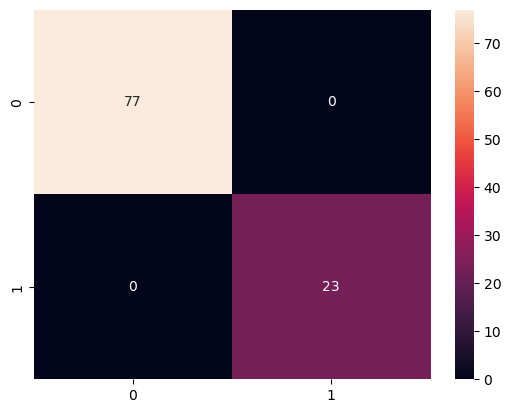

In [84]:
# Predicting performance on training data
y_predict=nb.predict(X_train)
y_predict
cm=confusion_matrix(y_train,y_predict)
sns.heatmap(cm,annot=True)

<Axes: >

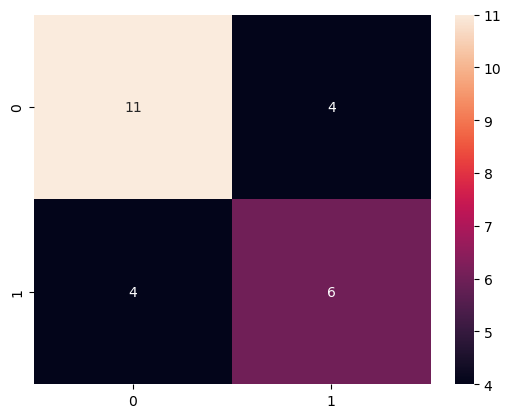

In [85]:
# Predicting performance on Testing data
y_pred=nb.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [86]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.60      0.60      0.60        10

    accuracy                           0.68        25
   macro avg       0.67      0.67      0.67        25
weighted avg       0.68      0.68      0.68        25

